Oscillateur harmonique
==========

Equation canonique 
--------

$\ddot x +sin(x)=0$

Système d'équations
-------------

$\ddot x(t+dt)=-sin(x(t))$


$\dot x(t+dt)=\dot x(t)+\ddot x(t).dt$


$x(t+dt)=x(t) + \dot x.dt$

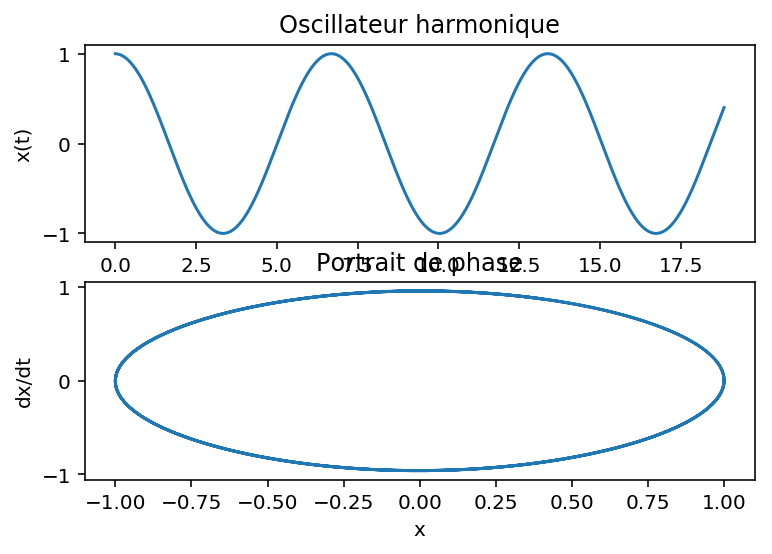

In [6]:
import matplotlib.pyplot as plt

from numpy import *

def resolution_numerique(dt,x,dx,f):
    '''
    retourne un tuple de listes de valeurs [temps][x][dx/dt] 
    solutions de l'équation différentielle ddx+f(x)=0
    '''
    temps=[_*dt for _ in range(round(6*pi/dt))]
    X,DX=[],[]
    for t in temps:
        ddx=eval(f)
        dx=dx+ddx*dt
        x=x+dx*dt
        X.append(x)
        DX.append(dx)
    return temps, X, DX
 
'''
Paramètres de simulation  
dt=0.01
x(0)=1
dx(0)/dt=0
'''  

temps, X, DX = resolution_numerique(0.01,1,0,"-sin(x)")

plt.subplot(211)
plt.title("Oscillateur harmonique")
plt.plot(temps,X)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.subplot(212)
plt.plot(X,DX)
plt.title("Portrait de phase")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.show()


Solution analytique de l'équation linéaire à l'ordre 1
============

L'approximation $sin(x) \approx x$ conduit à l'équation $\ddot x+x=0$

qui a pour solution $x(t)=x_0~cos(t)$

pour les conditions initiales $x(0)=x_0$ et $\dot x=0$

Comparaison solution linéaire et solution numérique
==============

Représentation graphique $x(t)$
------------------

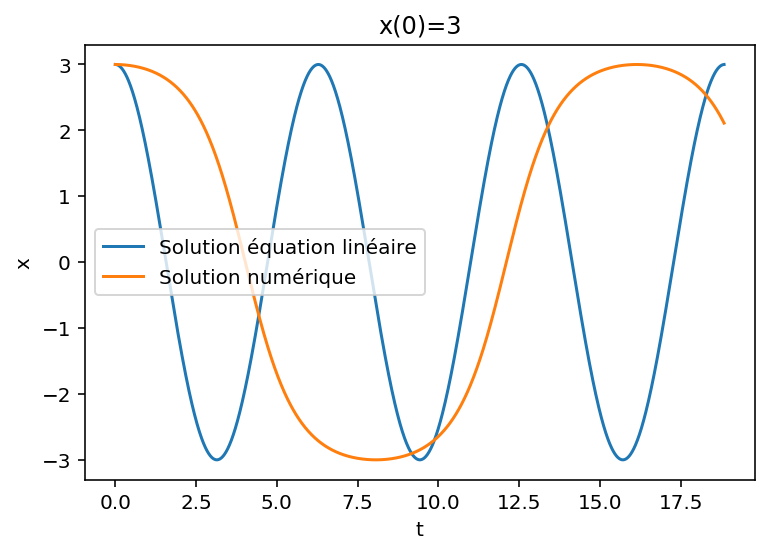

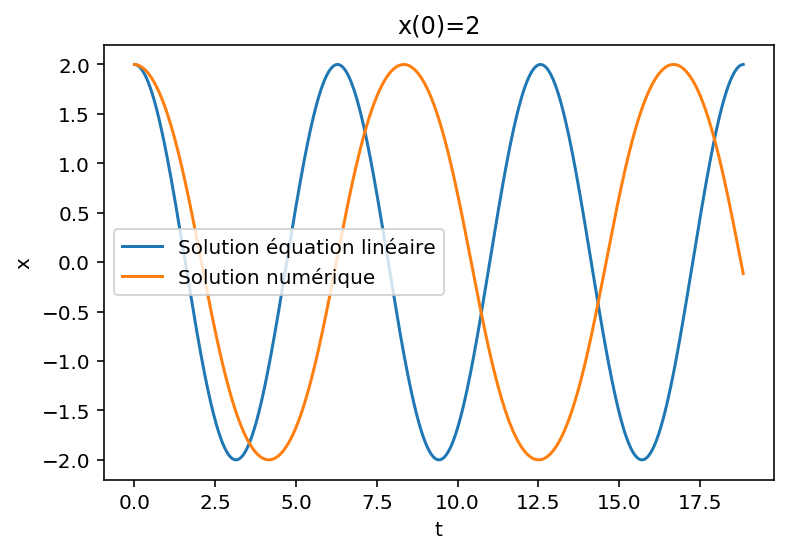

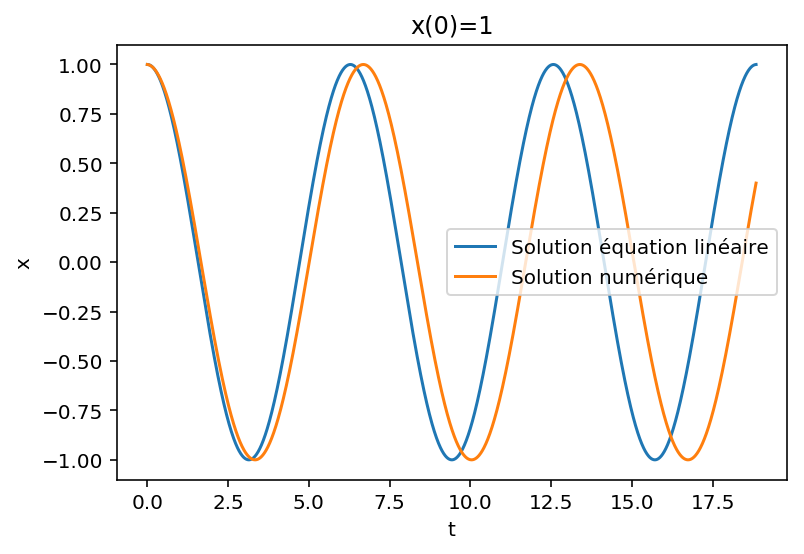

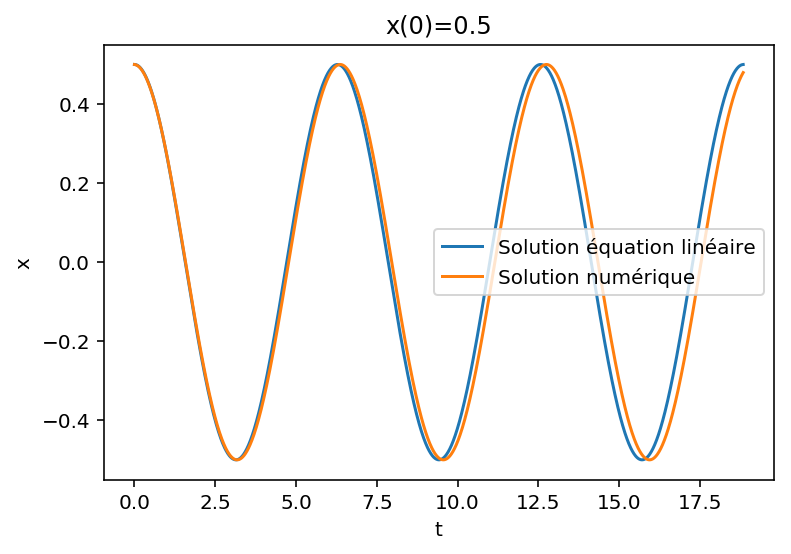

In [7]:
def trace_comparatif(x0):
    temps, X, DX=resolution_numerique(0.01,x0,0,"-sin(x)")
    solution_lineaire=[x0*cos(t) for t in temps]
    plt.title("x(0)="+str(x0))
    plt.plot(temps, solution_lineaire , label="Solution équation linéaire")
    plt.plot(temps, X , label="Solution numérique")
    plt.xlabel("t")
    plt.ylabel("x")
    plt.legend()
    plt.show()
    
trace_comparatif(3)
trace_comparatif(2)
trace_comparatif(1)
trace_comparatif(0.5)


Portrait de phase
-------

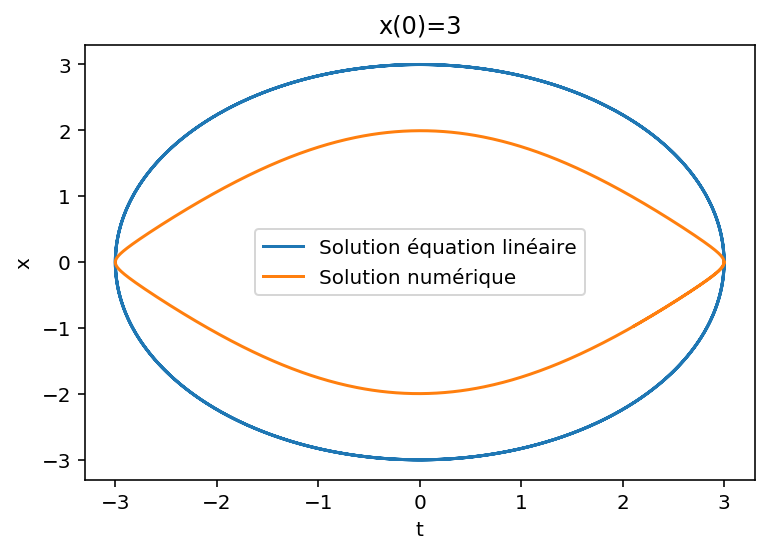

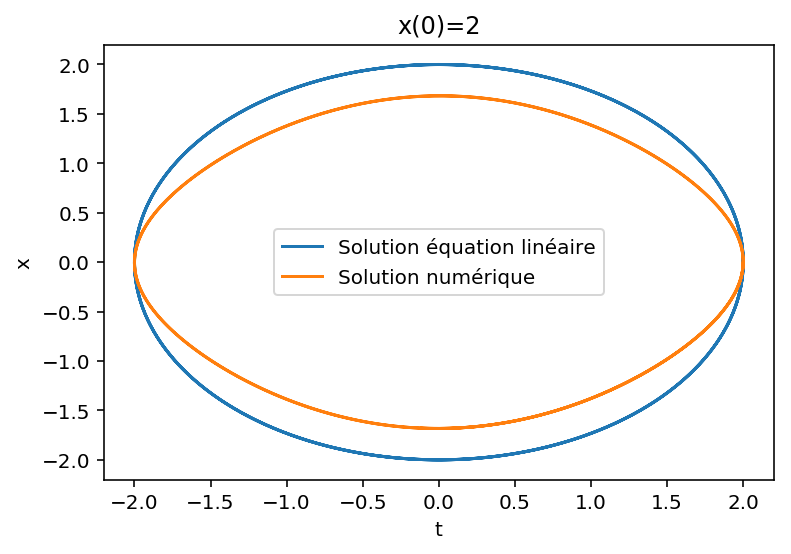

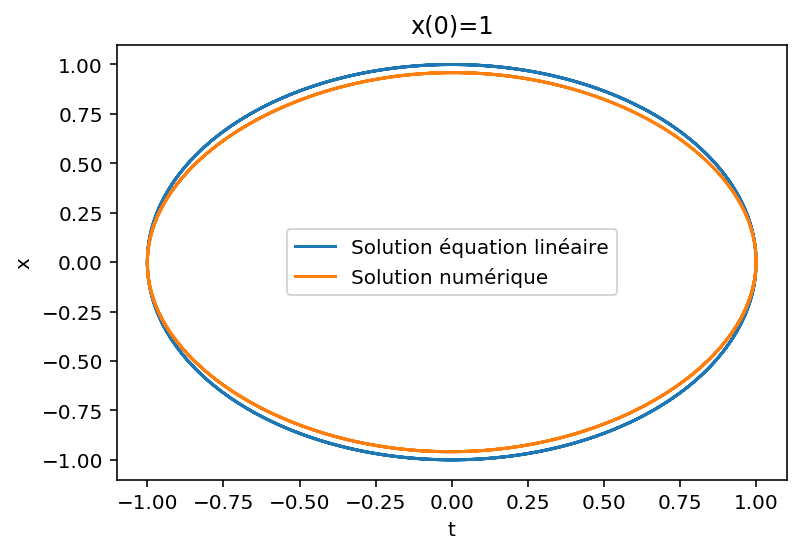

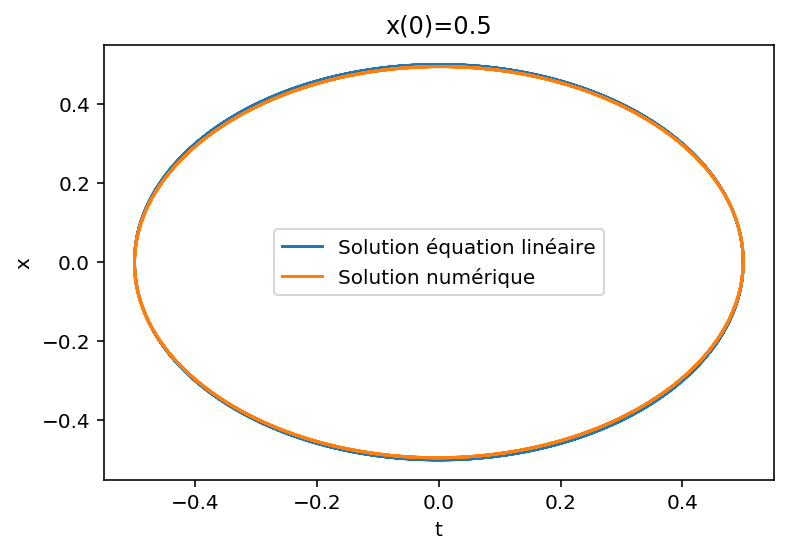

In [8]:
def trace_comparatif(x0):
    temps, X, DX=resolution_numerique(0.01,x0,0,"-sin(x)")
    solution_lineaire=[x0*cos(t) for t in temps]
    dsolution_lineaire=[-x0*sin(t) for t in temps]
    plt.title("x(0)="+str(x0))
    plt.plot( solution_lineaire , dsolution_lineaire, label="Solution équation linéaire")
    plt.plot( X , DX , label="Solution numérique")
    plt.xlabel("t")
    plt.ylabel("x")
    plt.legend()
    plt.show()
    
trace_comparatif(3)
trace_comparatif(2)
trace_comparatif(1)
trace_comparatif(0.5)

Quantification de l'écart au modèle linéaire
--------------------------

Représentation du rapport $\frac{\dot x_{max~numérique}}{\dot x_{max~analytique}}=f(x(0))$.

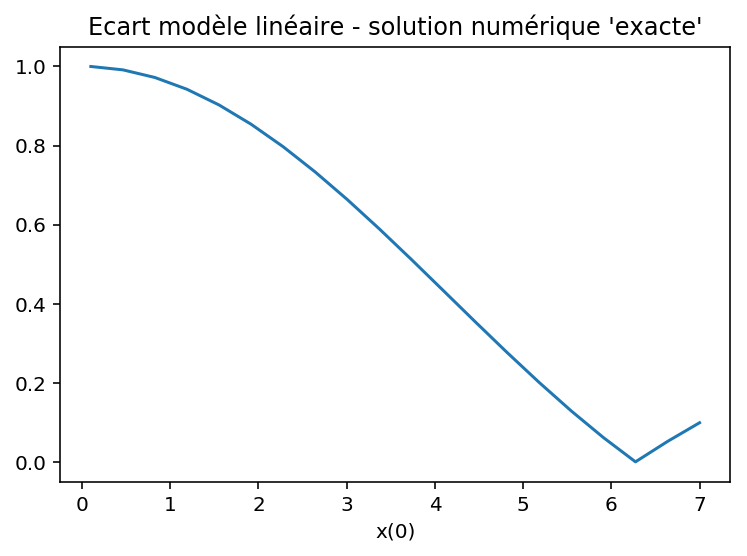

In [9]:
def trace_ecart():
    
    fraction=[]
    
    valeurs_x0=linspace(0.1,7,20)
    
    for x0 in valeurs_x0:
        dx=max(resolution_numerique(0.01,x0,0,"-sin(x)")[2])
        fraction.append(dx/x0)

    plt.title("Ecart modèle linéaire - solution numérique 'exacte'")
    plt.plot(valeurs_x0, fraction)
    plt.xlabel("x(0)")
    plt.show()

    
trace_ecart()

Conclusion
-----------

L'approximation linéaire est valable pour les faibles amplitudes. Moins de 5% d'écart par exemple pour $x \approx 1 radian$.
Dans ce cas les solutions numériques et la solution analytique sont très proches.
Dans le cas du pendule simple, cette approximation est appelée **loi des petits angles**.